In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [41]:
notebook_dir = os.getcwd()

checkpoint5_csv_path = os.path.join(notebook_dir, '..', 'data', 'checkpoints', 'checkpoint5_hashed.csv')

In [42]:
df = pd.read_csv(checkpoint5_csv_path)

In [43]:
df['Type'] = df['Type'].str.strip()

In [44]:
df['Type'].unique()

array(['ALARM/BURG', 'THREATS/PROG', 'TOW OF M/V', 'LOUD NOISE',
       'DOMESTIC/PAST', 'BUILDING CHK', 'NOISE ORD', 'HIT', 'MV/BLOCKING',
       'AUTO ACC/NO PI', 'DISTURBANCE', 'M/V STOP', 'UNWANTEDGUEST',
       'ALARMS', 'MEDIC SUPPORT', 'DISORDERLY', 'GENERAL SERV',
       'INVEST CONT', 'AUTO ACC/UNK PI', 'NEIGHBOR PROB', 'TOW/REPOSSED',
       'PARK', 'STOL/MV/PAS', 'TRESPASSING', 'WIRE DOWN', 'FRAUD',
       'LARCENY/PAST', 'ANIMAL COMPL', 'LOCKOUT', 'CK WELL BEING',
       'SUS PERS/MV', 'LIC PLATE STO', 'DOMESTIC/PROG', 'SEX OFF',
       'THREATS', 'ABAND MV', 'FIGHT', 'MAL DAMAGE', 'LOST PROPERTY',
       'SPECIAL CHECK', 'INVESTIGATION', 'NOTIFICATION',
       'SUICIDE ATTEMPT', 'ROBBERY ARMED', 'FIRE', '911 HANG UP',
       'KEEP PEACE', 'WARRANT SERVE', 'SHOTS FIRED', 'E911 HANGUP',
       'MISSING PERS', 'DRUG VIO', 'AUTO ACC/PI', '209A/SERVE',
       'RECOV/STOL/MV', 'MAN DOWN', 'LARCENY/MV/PAST', 'ASSIST FIRE',
       'VIO CITY ORD', 'WOMAN DOWN', 'ASSSIT OTHER PD', '

In [45]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the display width
pd.set_option('display.max_colwidth', None)  # Show full content of each column
df['Type'].value_counts()

Type
M/V STOP           91393
NOISE ORD          29493
BUILDING CHK       25011
EXTRA SURVEIL      15066
TOW OF M/V         14899
SUS PERS/MV        14158
ALARM/BURG         13866
AUTO ACC/NO PI     13523
DISTURBANCE        13173
MEDIC SUPPORT      12078
SPECIAL CHECK      11579
209A/SERVE          9485
CK WELL BEING       8822
MV/BLOCKING         8114
INVEST CONT         7101
HIT                 6669
KEEP PEACE          5752
VIO CITY ORD        5562
UNWANTEDGUEST       5408
LOUD NOISE          4940
911 HANG UP         4902
GENERAL SERV        4449
PARK                3940
ANIMAL COMPL        3897
TOW/REPOSSED        3538
ALARMS              2978
LARCENY/PAST        2943
WARRANT SERVE       2842
Location            2775
MAL DAMAGE          2695
BUSINESS CHK        2414
LOST PROPERTY       2397
TRESPASSING         2216
DOMESTIC/PROG       2194
MISSING PERS        2152
FIGHT               2131
AUTO ACC/UNK PI     2120
MAN DOWN            2073
INVESTIGATION       2053
DISORDERLY          

### Cleaning Type Column, Type == 'Location'

In [46]:
original_len = len(df)

# Drop rows where 'Type' is '' or 'Location'
df = df[~df['Type'].isin(['', 'Location'])]

# Print how many rows were dropped
print("Rows dropped:", original_len - len(df))

Rows dropped: 2775


### Cleaning Type Column, Type == '172'

In [47]:
original_len = len(df)

# Drop rows where 'Type' is '' or 'Location'
df = df[~df['Type'].isin(['', '172'])]

# Print how many rows were dropped
print("Rows dropped:", original_len - len(df))

Rows dropped: 104


In [48]:
df['Type'].value_counts()

Type
M/V STOP           91393
NOISE ORD          29493
BUILDING CHK       25011
EXTRA SURVEIL      15066
TOW OF M/V         14899
SUS PERS/MV        14158
ALARM/BURG         13866
AUTO ACC/NO PI     13523
DISTURBANCE        13173
MEDIC SUPPORT      12078
SPECIAL CHECK      11579
209A/SERVE          9485
CK WELL BEING       8822
MV/BLOCKING         8114
INVEST CONT         7101
HIT                 6669
KEEP PEACE          5752
VIO CITY ORD        5562
UNWANTEDGUEST       5408
LOUD NOISE          4940
911 HANG UP         4902
GENERAL SERV        4449
PARK                3940
ANIMAL COMPL        3897
TOW/REPOSSED        3538
ALARMS              2978
LARCENY/PAST        2943
WARRANT SERVE       2842
MAL DAMAGE          2695
BUSINESS CHK        2414
LOST PROPERTY       2397
TRESPASSING         2216
DOMESTIC/PROG       2194
MISSING PERS        2152
FIGHT               2131
AUTO ACC/UNK PI     2120
MAN DOWN            2073
INVESTIGATION       2053
DISORDERLY          2047
NOTIFICATION        

In [57]:
INCIDENT_CATEGORIES = {
    'MOTOR_VEHICLE_INCIDENTS': [
        'M/V STOP', 'AUTO ACC/NO PI', 'AUTO ACC/PED', 'AUTO ACC/PI', 'AUTO ACC/UNK PI',
        'DISABLED MV', 'TOW OF M/V', 'TOW/REPOSSED', 'TOW/TRESPASS', 'ABAND MV',
        'MV/BLOCKING', 'ROAD RAGE', 'DIRT BIKE', 'CRUISER ACCID', 'HIT',
        'LOCKOUT', 'STOL/MV/PAS', 'STOL/MV/PR', 'RECOV/STOL/MV', 'TOW/REC/STOL'
    ],

    'PREVENTIVE_POLICING': [
        'EXTRA SURVEIL', 'BUILDING CHK', 'BUSINESS CHK', 'PARK & WALK',
        'SPECIAL CHECK', 'SELECTIVE ENF', 'PARK'
    ],

    'PUBLIC_DISTURBANCES': [
        'DISTURBANCE', 'DISORDERLY', 'TRESPASSING', 'UNWANTEDGUEST',
        'NEIGHBOR PROB', 'VIO CITY ORD', 'LOUD NOISE', 'NOISE ORD',
        'DRINKING PUBL', 'PROSTITUTION', 'DK', 'ILLEGAL DUMPING', 'FIRE WORKS'
    ],

    'FIRE_AND_ARSON_INCIDENTS': [
        'FIRE', 'BUILDING FIRE', 'DUMPSTER FIRE', 'FIRE/MV', 'ALARM/BURG',
        'ALARM/HOLD', 'ALARM/BANK', 'ALARMS', 'ALARM OF FIRE', 'ALARM/MV',
        'ASSIST FIRE', 'ARSON/PAST', 'ARSON/PROG', 'ARSON/ATTEMPT'
    ],

    'DOMESTIC_DISPUTES_AND_PROTECTION': [
        '209A/SERVE', '209A/VIOLATION', 'EMERGENCY209A', 'EMERGENCY 209A', 'VIO 209A',
        'KEEP PEACE', 'UNATENEDCHILD', 'DOMESTIC/PAST', 'DOMESTIC/PROG',
        'LANDLORD PROB'
    ],

    'SUSPICIOUS_AND_UNUSUAL_ACTIVITY': [
        'SUS PERS/MV', 'VIDEO EXT', 'GANG', 'ANNOYING CALLS'
    ],

    'LAW_ENFORCEMENT_OPERATIONS': [
        'INVESTIGATION', 'INVEST CONT', 'SRU - FOLLOW UP', 'SEARCHWARRANT',
        'BOLO', 'FOLLOW UP', 'DETAIL', 'ESCORT', 'OFFICER ASSIS',
        'MUTUAL AID', 'PURSUIT', 'RIVER PARTROL', 'ASSSIT OTHER PD',
        'TRANSPORT', 'PRISONER CHK', 'EVIDENCE TRAN', 'EVIDENCE PROPER',
        'DRONE DEPLOYMEN', 'OUTSIDE WORK', 'CRUISER MAINT', 'SEIZED PROP', 'SRU'
    ],

    'MEDICAL_AND_WELFARE_ASSISTANCE': [
        'CK WELL BEING', 'AMBULANCE ASSSI', 'ASSSIT AMBULANC',
        'MAN DOWN', 'WOMAN DOWN', 'SUICIDE ATTEMPT', 'MEDIC SUPPORT',
        'ELDER SERVICE', 'SOCIAL SERV', 'MISSING PERS', 'LOST PERSON'
    ],

    'PROPERTY_CRIMES': [
        'B&E/PAST', 'B&E/PROG', 'B&E/MV/PAST', 'B&E/MV/PROG',
        'LARCENY/PAST', 'LARCENY/PROG', 'LARCENY/MV/PAST', 'LARCENY/MV/PROG',
        'LARCENY/ATTMEPT', 'SHOPLIFTING', 'MAL DAMAGE', 'MAL DAMG PROG',
        'VALDALISM/PAST', 'VANDALISM/PROG', 'STOLEN PROP', 'FOUND PROPERTY',
        'LOST PROPERTY', 'LIC PLATE STO'
    ],

    'FINANCIAL_CRIMES_AND_FRAUD': [
        'COUNTERFEIT', 'FORGERY PAST', 'FORGERY PROG', 'UTTERING/PAST',
        'FRAUD', 'IDENTITY THEFT', 'BRIBERY'
    ],

    'VIOLENT_AND_WEAPON_OFFENSES': [
        'FIGHT', 'A&B PAST', 'A&B PROG', 'A&B D/W PAST', 'A&B D/W/ PROG',
        'THREATS', 'THREATS/PROG', 'HARASSMENT', 'STALKING', 'ACCOSTING',
        'CARJACKING', 'CHILD ABUSE', 'ELDERLY ABUSE', 'KIDNAP/PAST', 'KIDNAP/PROG',
        'RAPE', 'RAPE/PAST', 'SEX OFF', 'SEX OFFENDER', 'SEX OFF PROG',
        'SEX OFF. PAST', 'SEX OFF ADDRESS', 'SHOTS FIRED', 'GUN CALL',
        'SCHOOL WEAPON', 'SHOTSPOTTER', 'HOMICIDE', 'AUTO FATALITY',
        'DEATH SUDDEN', 'ROBBERY ARMED', 'ROBBERY PAST', 'ROBBERY UNARM', 'ROBBERY PROG', 'HOME INVASION'
    ],

    'DRUG_AND_SUBSTANCE_USE': [
        'DRUG INVEST', 'DRUG OVERDOSE', 'DRUG EVIDENCE', 'DRUG VIO'
    ],

    'COURT_AND_ADMIN_PROCEDURES': [
        'COURT DOC SERVE', 'COURT TIME', 'WARRANT SERVE',
        'SERVE SEC 12', 'SERVE SEC 35', 'GENERAL SERV',
        'FUNERAL ESCOR', 'STA RELIEF', 'INSERVICE TNG',
        'TRAINING', 'ALARM/EXCUSED'
    ],

    'OTHER': [
        'WIRE DOWN', 'ANIMAL COMPL', 'NOTIFICATION', '911 HANG UP',
        'E911 HANGUP', 'CLOSE STREET', 'TEST QED', 'UNKNOWN PROB',
        'TENANT PROB', 'CIVIL PROB', 'MISC', 'ADMININSTR',
        'BOMB SCARE', 'FIRE/HYD/OPEN', 'EXPLOSION', 'UNION BUSINES',
        'IA COMPLAINT', 'SCHOOL MEDIATIO', 'SCHOOL MEETING', 'OTHER AGENCY'
    ]
}

In [58]:
def create_reverse_mapping(categories):
    """Create a mapping from incident type to category."""
    reverse_map = {}
    for category, incidents in categories.items():
        for incident in incidents:
            reverse_map[incident] = category
    return reverse_map

In [59]:
# Create reverse mapping
incident_to_category = create_reverse_mapping(INCIDENT_CATEGORIES)

In [60]:
# Add category column
df['category'] = df['Type'].map(lambda x: incident_to_category.get(x, 'OTHER'))

In [61]:
df['category'].value_counts(normalize = True)

category
MOTOR_VEHICLE_INCIDENTS             0.352580
PUBLIC_DISTURBANCES                 0.159906
PREVENTIVE_POLICING                 0.139100
MEDICAL_AND_WELFARE_ASSISTANCE      0.068448
DOMESTIC_DISPUTES_AND_PROTECTION    0.049079
FIRE_AND_ARSON_INCIDENTS            0.047258
OTHER                               0.037525
SUSPICIOUS_AND_UNUSUAL_ACTIVITY     0.033957
LAW_ENFORCEMENT_OPERATIONS          0.031785
PROPERTY_CRIMES                     0.026594
COURT_AND_ADMIN_PROCEDURES          0.021868
VIOLENT_AND_WEAPON_OFFENSES         0.020331
DRUG_AND_SUBSTANCE_USE              0.007830
FINANCIAL_CRIMES_AND_FRAUD          0.003739
Name: proportion, dtype: float64

In [62]:
df[df['category']=='OTHER']['Type'].unique()

array(['WIRE DOWN', 'ANIMAL COMPL', 'NOTIFICATION', '911 HANG UP',
       'E911 HANGUP', 'CLOSE STREET', 'TEST QED', 'UNKNOWN PROB',
       'TENANT PROB', 'CIVIL PROB', 'MISC', 'ADMININSTR', 'BOMB SCARE',
       'FIRE/HYD/OPEN', 'EXPLOSION', 'UNION BUSINES', 'IA COMPLAINT',
       'SCHOOL MEDIATIO', 'SCHOOL MEETING', 'OTHER AGENCY',
       'ASSIT OTR AGENY'], dtype=object)

In [63]:
df['category'].value_counts()

category
MOTOR_VEHICLE_INCIDENTS             148155
PUBLIC_DISTURBANCES                  67193
PREVENTIVE_POLICING                  58450
MEDICAL_AND_WELFARE_ASSISTANCE       28762
DOMESTIC_DISPUTES_AND_PROTECTION     20623
FIRE_AND_ARSON_INCIDENTS             19858
OTHER                                15768
SUSPICIOUS_AND_UNUSUAL_ACTIVITY      14269
LAW_ENFORCEMENT_OPERATIONS           13356
PROPERTY_CRIMES                      11175
COURT_AND_ADMIN_PROCEDURES            9189
VIOLENT_AND_WEAPON_OFFENSES           8543
DRUG_AND_SUBSTANCE_USE                3290
FINANCIAL_CRIMES_AND_FRAUD            1571
Name: count, dtype: int64

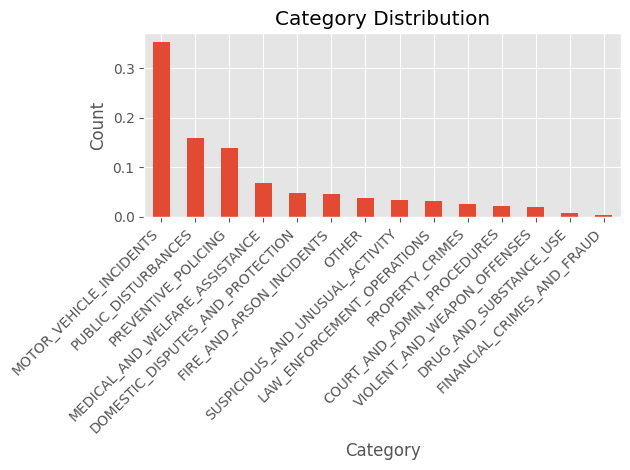

In [64]:
# Assuming you have a DataFrame with a 'category' column
df['category'].value_counts(normalize = True).plot(kind='bar')

# Add some styling to make it more readable
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

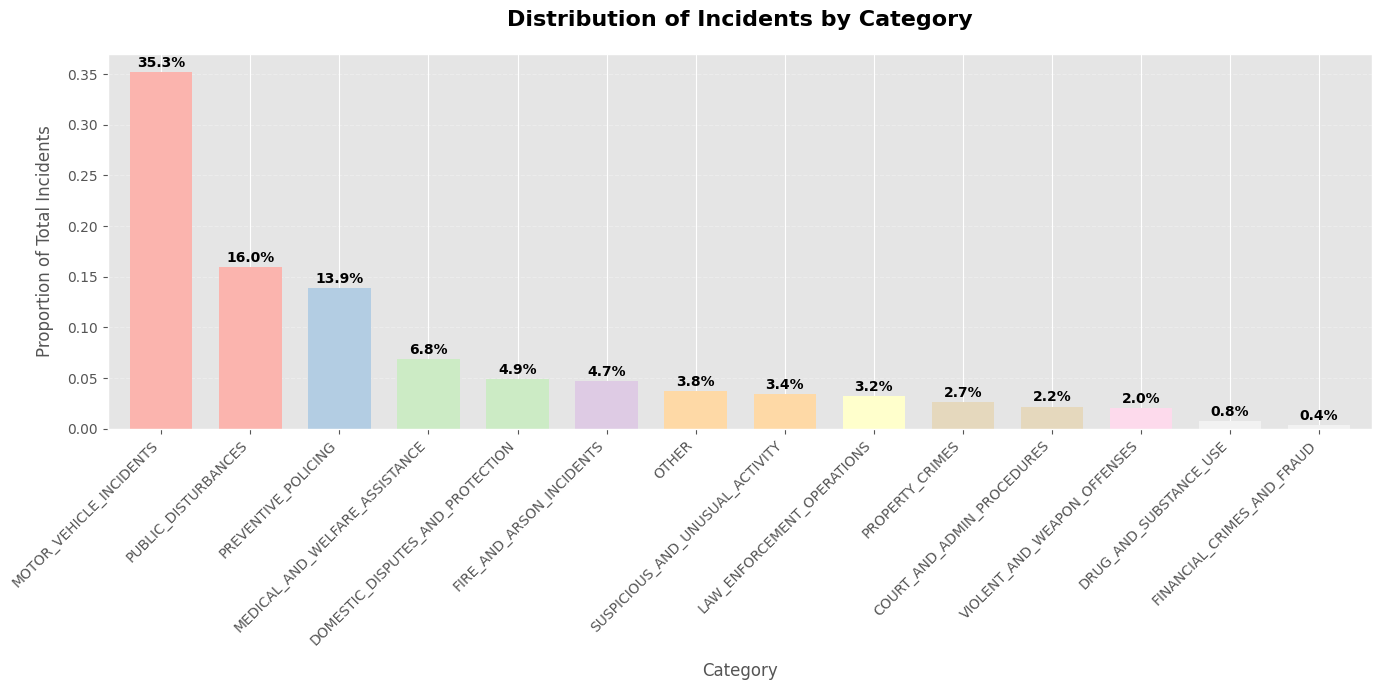

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')

data = {
    'category': [
        'MOTOR_VEHICLE_INCIDENTS', 'PUBLIC_DISTURBANCES', 'PREVENTIVE_POLICING',
        'MEDICAL_AND_WELFARE_ASSISTANCE', 'DOMESTIC_DISPUTES_AND_PROTECTION',
        'FIRE_AND_ARSON_INCIDENTS', 'OTHER', 'SUSPICIOUS_AND_UNUSUAL_ACTIVITY',
        'LAW_ENFORCEMENT_OPERATIONS', 'PROPERTY_CRIMES', 'COURT_AND_ADMIN_PROCEDURES',
        'VIOLENT_AND_WEAPON_OFFENSES', 'DRUG_AND_SUBSTANCE_USE', 'FINANCIAL_CRIMES_AND_FRAUD'
    ],
    'value': [
        0.352580, 0.159906, 0.139100,
        0.068448, 0.049079, 0.047258, 0.037525,
        0.033957, 0.031785, 0.026594, 0.021868,
        0.020331, 0.007830, 0.003739
    ]
}

# Create DataFrame
plot_df = pd.DataFrame(data)

# Create figure
plt.figure(figsize=(14, 7))

# Generate pastel color palette
colors = plt.cm.Pastel1(np.linspace(0, 1, len(plot_df)))

# Plot bar chart
ax = plot_df.set_index('category')['value'].plot(
    kind='bar',
    width=0.7,
    color=colors,
    edgecolor='none'
)

# Titles and labels
plt.title('Distribution of Incidents by Category', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Category', fontsize=12, labelpad=10)
plt.ylabel('Proportion of Total Incidents', fontsize=12, labelpad=10)

# X and Y tick customization
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add percentage labels on top of bars
for i, v in enumerate(plot_df['value']):
    ax.text(i, v + 0.002, f'{v:.1%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Subtle grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Layout adjustment
plt.tight_layout()
plt.show()

In [66]:
print(df.columns)

Index(['Incident #', 'Date', 'Type', 'Location', 'Arrested', 'Location Prefix',
       'Name', 'DOB', 'Charges', 'latitude', 'longitude', 'Cleaned Location',
       'person_id', 'category'],
      dtype='object')


In [67]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Prepare data for JavaScript
years = sorted(df['Year'].unique())

In [68]:
data_by_year = {}
for year in years:
    df_year = df[df['Year'] == year]
    category_props = df_year['category'].value_counts(normalize=True)

    type_props = {}
    for category in category_props.index:
        category_data = df_year[df_year['category'] == category]
        type_counts = category_data['Type'].value_counts(normalize=True)
        type_props[category] = {
            'types': type_counts.index.tolist(),
            'values': [float(x) for x in type_counts.values]
        }

    data_by_year[int(year)] = {
        'categories': category_props.index.tolist(),
        'values': [float(x) for x in category_props.values],
        'type_data': type_props
    }

In [69]:
notebook_dir = os.getcwd()
output_path = os.path.join(notebook_dir, '..', 'data', 'checkpoints', 'checkpoint6_category_crime_year.csv')

df.to_csv(output_path, index=False)

In [70]:
import os

# Ensure the Figures directory exists
os.makedirs('../Figures', exist_ok=True)

In [71]:
import json


html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Lawrence Police Daily Logs Dashboard</title>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;500;700&display=swap" rel="stylesheet">
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
            font-family: 'Roboto', sans-serif;
        }

        body {
            background-color: #f5f6fa;
            color: #2d3436;
        }

        .header {
            background: linear-gradient(135deg, #0c2461 0%, #1e3799 100%);
            color: white;
            padding: 2rem 0;
            margin-bottom: 2rem;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
        }

        .header h1 {
            text-align: center;
            font-size: 2.5rem;
            font-weight: 500;
        }

        .dashboard {
            max-width: 1400px;
            margin: 0 auto;
            padding: 0 20px;
        }

        .controls {
            background: white;
            padding: 1.5rem;
            border-radius: 10px;
            margin-bottom: 2rem;
            text-align: center;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.05);
        }

        .controls label {
            font-size: 1.1rem;
            margin-right: 1rem;
            font-weight: 500;
        }

        select {
            padding: 8px 16px;
            font-size: 1rem;
            border: 2px solid #dfe6e9;
            border-radius: 6px;
            width: 200px;
            background-color: white;
            cursor: pointer;
            transition: border-color 0.3s ease;
        }

        select:hover, select:focus {
            border-color: #74b9ff;
            outline: none;
        }

        .charts {
            display: grid;
            grid-template-columns: repeat(2, 1fr);
            gap: 2rem;
            margin-top: 20px;
        }

        .chart {
            background: white;
            border-radius: 10px;
            padding: 1.5rem;
            min-height: 650px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.05);
            display: flex;
            justify-content: center;
            align-items: center;
        }

        @media (max-width: 1200px) {
            .charts {
                grid-template-columns: 1fr;
            }
            .chart {
                min-height: 500px;
            }
        }

        @media (max-width: 768px) {
            .header h1 {
                font-size: 2rem;
            }
            .dashboard {
                padding: 0 10px;
            }
        }
    </style>
</head>
<body>
    <div class="header">
        <h1>Lawrence Police Daily Logs Dashboard</h1>
    </div>
    <div class="dashboard">
        <div class="controls">
            <label for="year-select">Select Year:</label>
            <select id="year-select"></select>
        </div>
        <div class="charts">
            <div class="chart" id="bar-chart"></div>
            <div class="chart" id="sunburst-chart"></div>
        </div>
    </div>

    <script>
        const dashboardData = """ + json.dumps(data_by_year) + """;
        let currentCategory = null;

        const yearSelect = document.getElementById('year-select');
        Object.keys(dashboardData).sort().forEach(year => {
            const option = document.createElement('option');
            option.value = year;
            option.textContent = year;
            yearSelect.appendChild(option);
        });

        function updateCharts(year) {
            const yearData = dashboardData[year];

            const barData = [{
                x: yearData.categories.map(cat => 
                cat.replace(/_/g, ' ').replace(/(.{15})/g, "$1<br>")
                ),
                y: yearData.values,
                type: 'bar',
                marker: {
                    color: yearData.categories.map(cat =>
                        cat === currentCategory ? '#3498db' : '#bdc3c7'
                    )
                },
                text: yearData.values.map(v => `${(v * 100).toFixed(1)}%`),
                textposition: 'auto'
            }];

            const barLayout = {
                title: {
                    text: `Distribution of Incidents by Category (${year})`,
                    font: { size: 16, color: '#2d3436', family: 'Roboto' }
                },
                xaxis: {
                    title: 'Category',
                    tickangle: -45,
                    gridcolor: '#f7f7f7'
                },
                yaxis: {
                    title: 'Percentage',
                    tickformat: ',.0%',
                    gridcolor: '#f7f7f7'
                },
                height: 650,
                margin: {t: 50, l: 50, r: 25, b: 100},
                paper_bgcolor: 'white',
                plot_bgcolor: 'white'
            };

            Plotly.newPlot('bar-chart', barData, barLayout);

            if (currentCategory) {
                updateSunburst(year, currentCategory);
            }

            document.getElementById('bar-chart').on('plotly_click', function(data) {
                const category = yearData.categories[data.points[0].pointIndex];
                currentCategory = category;
                updateSunburst(year, category);

                const update = {
                    'marker.color': [yearData.categories.map(cat =>
                        cat === category ? '#3498db' : '#bdc3c7'
                    )]
                };
                Plotly.restyle('bar-chart', update);
            });
        }

        function updateSunburst(year, category) {
            const typeData = dashboardData[year].type_data[category];
            const sunburstData = [{
                type: "sunburst",
                labels: [category].concat(typeData.types),
                parents: [""].concat(Array(typeData.types.length).fill(category)),
                values: [1].concat(typeData.values),
                textinfo: "label+percent parent",
                hovertemplate: 'Type: %{label}<br>Percentage: %{value:.1%}<extra></extra>',
                insidetextorientation: 'radial',
                maxdepth: 2,
                rotation: 90,
                branchvalues: 'total',
                marker: {
                    colors: ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6', '#1abc9c', '#e67e22']
                }
            }];

            const sunburstLayout = {
                title: {
                    text: `Types within ${category} (${year})`,
                    font: { size: 16, color: '#2d3436', family: 'Roboto' },
                    y: 0.995,
                    x: 0.5,
                    xanchor: 'center',
                    yanchor: 'top'
                },
                height: 550,
                width: 550,
                margin: {t: 50, l: 0, r: 0, b: 0},
                showlegend: false,
                grid: {rows: 1, columns: 1},
                autosize: false,
                paper_bgcolor: 'white'
            };

            const config = {
                responsive: true,
                displayModeBar: false
            };

            Plotly.newPlot('sunburst-chart', sunburstData, sunburstLayout, config);
        }

        yearSelect.addEventListener('change', function() {
            updateCharts(this.value);
        });
        updateCharts(yearSelect.value);
    </script>
</body>
</html>
"""

# Save the HTML file
with open('../Figures/incident_dashboard.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

print("Dashboard has been saved as 'incident_dashboard.html'")

Dashboard has been saved as 'incident_dashboard.html'


In [72]:
notebook_dir = os.getcwd()

checkpoint6_csv_path = os.path.join(notebook_dir, '..', 'data', 'checkpoints', 'checkpoint6_category_crime_year.csv')

In [73]:
df = pd.read_csv(checkpoint6_csv_path)

In [74]:
# Define FBI-based serious crime types
SERIOUS_TYPES = {
    'HOMICIDE', 'AUTO FATALITY', 'DEATH SUDDEN',
    'RAPE', 'RAPE/PAST', 'SEX OFF', 'SEX OFF PROG', 'SEX OFFENDER',
    'SEX OFF. PAST', 'SEX OFF ADDRESS', 'CHILD ABUSE',
    'ROBBERY ARMED', 'ROBBERY PAST', 'ROBBERY PROG', 'ROBBERY UNARM', 'HOME INVASION',
    'FIGHT', 'A&B D/W PAST', 'A&B D/W/ PROG', 'SHOTS FIRED', 'GUN CALL', 'SCHOOL WEAPON', 'SHOTSPOTTER',
    'B&E/PAST', 'B&E/PROG', 'B&E/MV/PAST', 'B&E/MV/PROG',
    'LARCENY/PAST', 'LARCENY/PROG', 'LARCENY/MV/PAST', 'LARCENY/MV/PROG',
    'LARCENY/ATTMEPT', 'SHOPLIFTING',
    'STOL/MV/PAS', 'STOL/MV/PR', 'RECOV/STOL/MV', 'TOW/REC/STOL',
    'ARSON/PAST', 'ARSON/PROG', 'ARSON/ATTEMPT',
    'KIDNAP/PAST', 'KIDNAP/PROG', 'DOMESTIC/PAST', 'DOMESTIC/PROG',
    'VIO 209A', '209A/VIOLATION', 'EMERGENCY209A',
    'DRUG INVEST', 'DRUG VIO', 'DRUG OVERDOSE', 'DRUG EVIDENCE',
    'FRAUD', 'FORGERY PAST', 'FORGERY PROG', 'COUNTERFEIT', 'IDENTITY THEFT', 'BRIBERY', 'UTTERING/PAST', 
    'THREATS', 'THREATS/PROG', 'STALKING', 'ACCOSTING',
    'CARJACKING', 'ELDERLY ABUSE', 'MAL DAMG','MAL DAMG PROG', 'PURSUIT'

}

# Normalize the 'Type' column and create the 'crime_severity' column
df['crime_severity'] = df['Type'].str.upper().apply(
    lambda t: 'Serious' if t in SERIOUS_TYPES else 'Non-Serious'
)

In [75]:
print(df['crime_severity'].value_counts())

crime_severity
Non-Serious    395860
Serious         24342
Name: count, dtype: int64


In [76]:
notebook_dir = os.getcwd()
output_path = os.path.join(notebook_dir, '..', 'data', 'checkpoints', 'checkpoint7_serious_crimes.csv')

df.to_csv(output_path, index=False)
